In [1]:
# mall_kmeans_clustering.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

c:\Users\Bao Dinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Bao Dinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Bao Dinh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Bao Dinh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, c

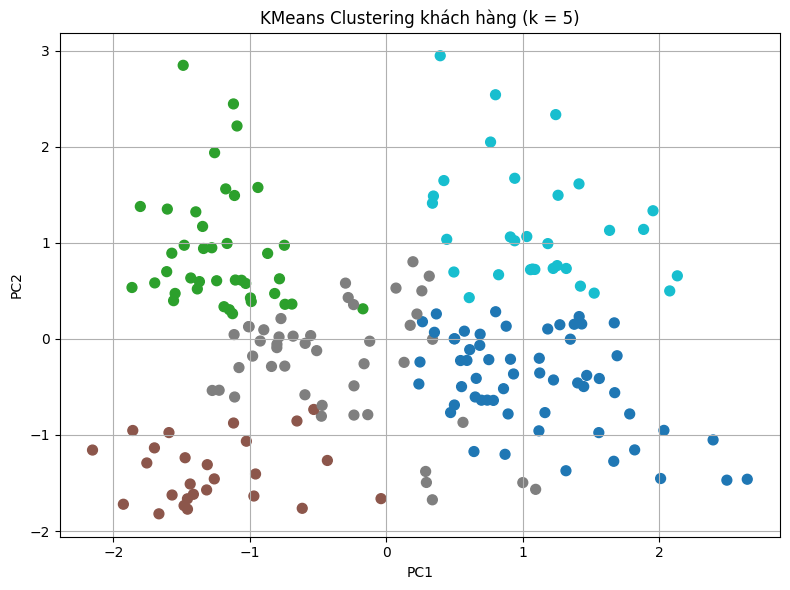

Silhouette Score: 0.4085


In [3]:

# 1. Đọc dữ liệu CSV
df = pd.read_csv("Mall_Customers.csv")

# 2. Chọn các thuộc tính để phân cụm
# Có thể chọn 2 hoặc 3 feature tùy theo phân tích
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# 3. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Áp dụng KMeans clustering
k = 5  # giả sử muốn phân 5 nhóm khách hàng
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
clusters = kmeans.labels_

# 5. PCA để giảm chiều xuống 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.title(f"KMeans Clustering khách hàng (k = {k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Đánh giá chất lượng phân cụm (nếu không có nhãn thật)
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f}")
